## **Preparação do ambiente, importação dos dados e análise exploratória**

In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from sklearn.exceptions import FitFailedWarning 
warnings.filterwarnings("ignore")


#Dados de coleta importados via csv de um repositório no github
#Link do repositório: https://github.com/eduardoscavalcanti/TCC_inteligencia_artificial_trocador_de_calor
raw_data =     'https://raw.githubusercontent.com/eduardoscavalcanti/TCC_inteligencia_artificial_trocador_de_calor/main/dados_treino_completo.csv'#16800


df = pd.read_csv(raw_data)
df

#'https://raw.githubusercontent.com/eduardoscavalcanti/TCC_inteligencia_artificial_trocador_de_calor/main/dados_treino.csv'#12600
#'https://raw.githubusercontent.com/eduardoscavalcanti/TCC_inteligencia_artificial_trocador_de_calor/main/dados_grupo_8.csv'#80
#'https://raw.githubusercontent.com/eduardoscavalcanti/TCC_inteligencia_artificial_trocador_de_calor/main/dados_treino%20kelvin.csv'#16800 kelvin

Data       T1       T2       T3       T4  \
0      26/10/2022 16:44:43321600  37.0636  28.2552  25.8884  25.0832   
1      26/10/2022 16:44:44335600  37.1368  28.2308  26.0348  25.0832   
2      26/10/2022 16:44:45334000  37.0880  28.0600  25.9616  25.1564   
3      26/10/2022 16:44:46394800  37.1124  27.9380  25.8396  25.1076   
4      26/10/2022 16:44:47330800  36.9660  27.9380  25.8884  25.1076   
...                          ...      ...      ...      ...      ...   
16794  26/09/2022 21:16:20761000  39.5524  28.7188  30.1096  19.8860   
16795  26/09/2022 21:16:21759400  39.5768  28.7920  30.1096  19.8616   
16796  26/09/2022 21:16:22757800  39.5768  28.7188  30.1096  19.8616   
16797  26/09/2022 21:16:23756200  39.5524  28.7432  30.1096  19.8860   
16798  26/09/2022 21:16:24770200  39.5768  28.7676  30.1096  19.8860   

               F1     F2 Amostra  
0       12.614795    0.0  acq500  
1        7.986195    0.0  acq500  
2       10.763355    0.0  acq500  
3       11.689075    0.0  acq500  
4       12.614795    0.0  acq500  
...           ...    ...     ...  
16794  241.267635  852.0  4200v0  
16795  241.267635  848.0  4200v0  
16796  242.193355  850.0  4200v0  
16797  241.267635  852.0  4200v0  
16798  241.267635  853.0  4200v0  

[16799 rows x 8 columns]

In [ ]:
#Remoção de vazoes quente e fria menores que 50 L/h 
df.drop(df[df.F1 < 50].index, inplace=True)
df.drop(df[df.F2 < 50].index, inplace=True)


#Colunas renomeadas para maior clareza
df.rename(columns={'T1': 'T1 - Entrada Quente', 
                   'T2': 'T2 - Saída Quente', 
                   'T3': 'T3 - Saída Fria',
                   'T4': 'T4 - Entrada Fria',
                   'F1': 'F1 - Vazão Quente',
                   'F2': 'F2 - Vazão Fria'
}, inplace=True)

df


Data  T1 - Entrada Quente  T2 - Saída Quente  \
20     26/10/2022 16:45:43444000              36.3072            25.9372   
21     26/10/2022 16:45:49450000              36.0876            26.6448   
22     26/10/2022 16:45:50464000              35.9656            26.6204   
23     26/10/2022 16:46:01462000              36.1364            26.9376   
24     26/10/2022 16:46:07468000              36.7952            27.4744   
...                          ...                  ...                ...   
16794  26/09/2022 21:16:20761000              39.5524            28.7188   
16795  26/09/2022 21:16:21759400              39.5768            28.7920   
16796  26/09/2022 21:16:22757800              39.5768            28.7188   
16797  26/09/2022 21:16:23756200              39.5524            28.7432   
16798  26/09/2022 21:16:24770200              39.5768            28.7676   

       T3 - Saída Fria  T4 - Entrada Fria  F1 - Vazão Quente  F2 - Vazão Fria  \
20             28.1576            24.8148          53.346475            384.0   
21             28.4748            24.9612          75.563755            510.0   
22             28.4016            24.9612          81.118075            531.0   
23             28.3284            24.9368         118.146875            835.0   
24             28.5968            24.9856         134.809835            909.0   
...                ...                ...                ...              ...   
16794          30.1096            19.8860         241.267635            852.0   
16795          30.1096            19.8616         241.267635            848.0   
16796          30.1096            19.8616         242.193355            850.0   
16797          30.1096            19.8860         241.267635            852.0   
16798          30.1096            19.8860         241.267635            853.0   

      Amostra  
20     acq500  
21     acq500  
22     acq500  
23     acq500  
24     acq500  
...       ...  
16794  4200v0  
16795  4200v0  
16796  4200v0  
16797  4200v0  
16798  4200v0  

[12811 rows x 8 columns]

In [ ]:
#Describe
df.describe()

T1 - Entrada Quente  T2 - Saída Quente  T3 - Saída Fria  \
count         12811.000000       12811.000000     12811.000000   
mean             38.466949          30.250513        32.343980   
std               1.302409           3.336488         3.853867   
min              28.108800          20.056800        20.813200   
25%              37.502800          28.499200        29.450800   
50%              38.015200          30.012000        31.915200   
75%              39.479200          32.159200        34.965200   
max              41.772800          39.894000        41.724000   

       T4 - Entrada Fria  F1 - Vazão Quente  F2 - Vazão Fria  
count       12811.000000       12811.000000     12811.000000  
mean           21.839265         188.080393       564.871204  
std             0.928674          56.893837       333.956627  
min            19.495600          51.495035        50.000000  
25%            21.179200         154.249955       269.000000  
50%            21.960000         205.164555       500.000000  
75%            22.521200         235.713315       853.000000  
max            24.985600         258.856315      1177.000000

In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 20 to 16798
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 12811 non-null  object 
 1   T1 - Entrada Quente  12811 non-null  float64
 2   T2 - Saída Quente    12811 non-null  float64
 3   T3 - Saída Fria      12811 non-null  float64
 4   T4 - Entrada Fria    12811 non-null  float64
 5   F1 - Vazão Quente    12811 non-null  float64
 6   F2 - Vazão Fria      12811 non-null  float64
 7   Amostra              12811 non-null  object 
dtypes: float64(6), object(2)
memory usage: 900.8+ KB


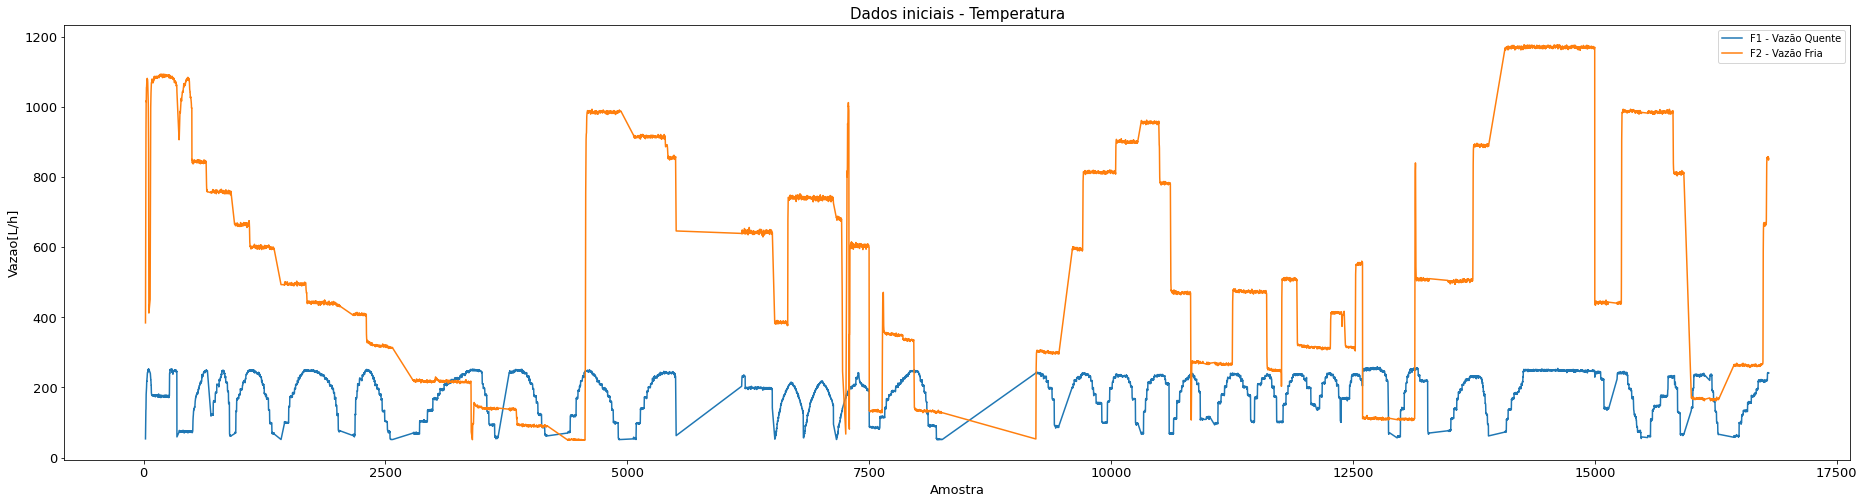

In [ ]:
#Plot das vazoes
plt.figure(figsize=(32,8))
plt.plot(df.index, df['F1 - Vazão Quente'])
plt.plot(df.index, df['F2 - Vazão Fria'])
plt.title('Dados iniciais - Temperatura',fontsize=15)
plt.legend(['F1 - Vazão Quente', 'F2 - Vazão Fria'],loc=0)
plt.xlabel('Amostra',fontsize=13)
plt.ylabel('Vazao[L/h]',fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

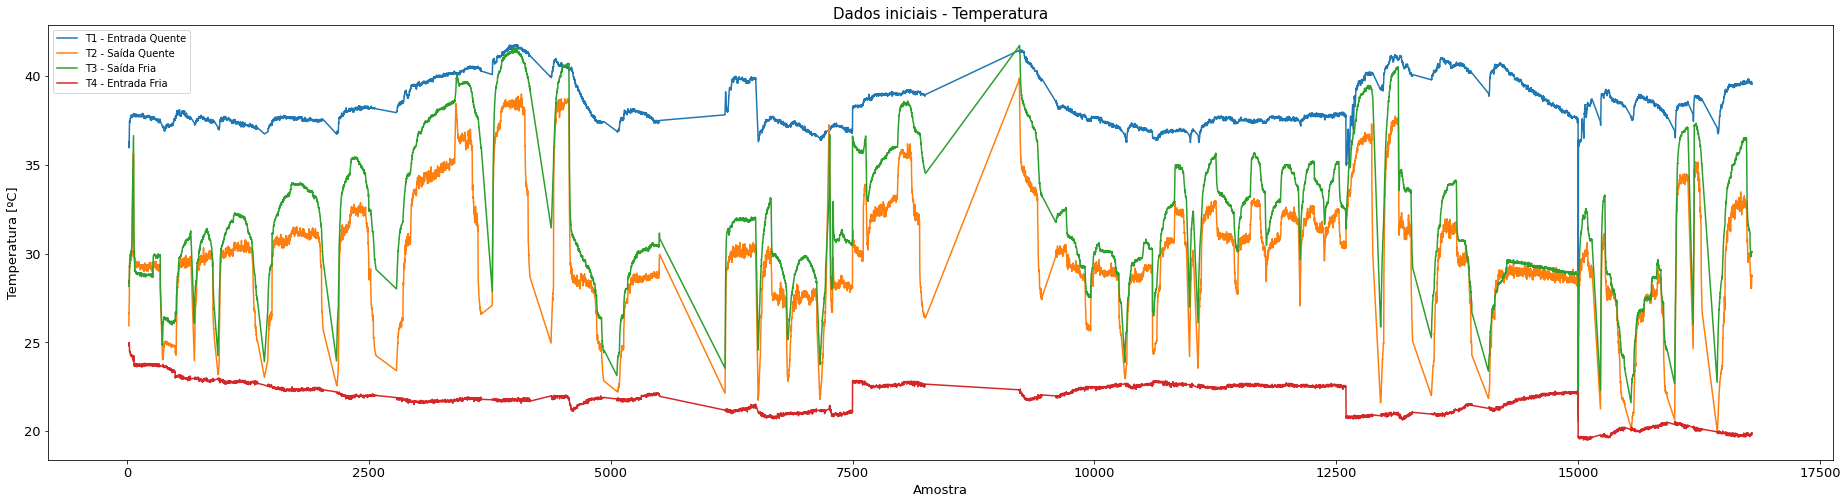

In [ ]:
#Plot das temperaturas
plt.figure(figsize=(32,8))
plt.plot(df.index, df['T1 - Entrada Quente'])
plt.plot(df.index, df['T2 - Saída Quente'])
plt.plot(df.index, df['T3 - Saída Fria'])
plt.plot(df.index, df['T4 - Entrada Fria'])
plt.title('Dados iniciais - Temperatura',fontsize=15)
plt.legend(['T1 - Entrada Quente', 'T2 - Saída Quente','T3 - Saída Fria','T4 - Entrada Fria'],loc=0)
plt.xlabel('Amostra',fontsize=13)
plt.ylabel('Temperatura [ºC]',fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

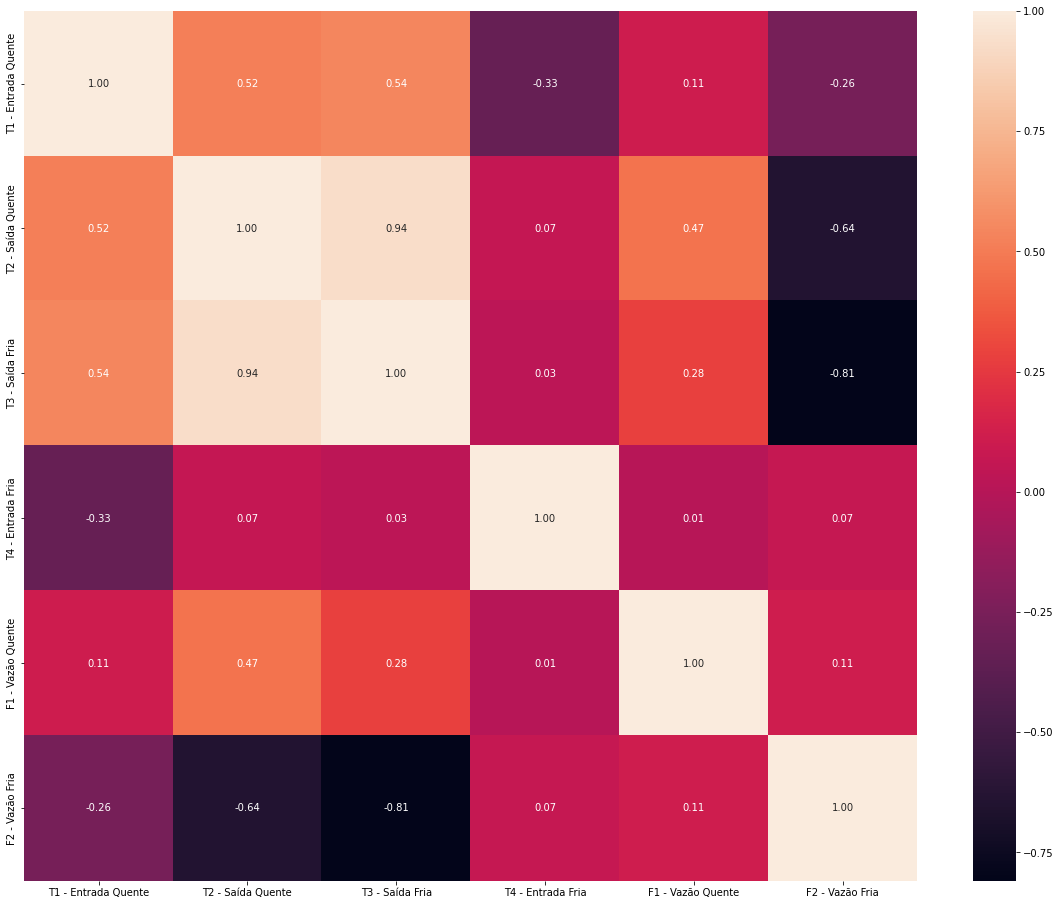

In [ ]:
#Correlacao entre as variaveis
matriz_corr = df.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(matriz_corr,annot = True, fmt = ".2f")

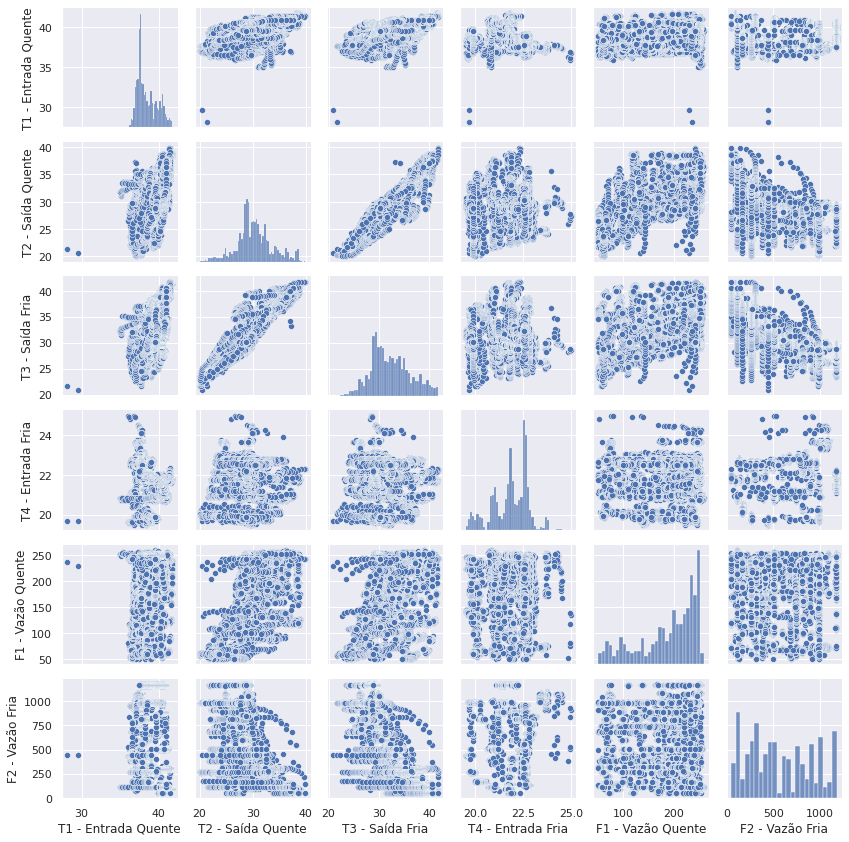

In [ ]:
#Correlacao entre as variaveis
colunas = ['T1 - Entrada Quente','T2 - Saída Quente','T3 - Saída Fria','T4 - Entrada Fria','F1 - Vazão Quente','F2 - Vazão Fria']
sns.set()
sns.pairplot(df[colunas], size=2)
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                  

## **Preparação dos dados**

In [ ]:
#Particionamento dos dados em x e y
X_data = df[['T1 - Entrada Quente','T2 - Saída Quente','T3 - Saída Fria','T4 - Entrada Fria','F2 - Vazão Fria']]
y_data = df['F1 - Vazão Quente']


In [ ]:
#Seed
SEED = 7
np.random.seed(SEED)

#Treino e teste na proporcao 80/20 com a biblioteca train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25,random_state = 13)
print("Treino com %d pontos de coleta e teste com %d" % (len(X_train), len(X_test)))

#Dados normalizados de -1 a 1 pela biblioteca StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



Treino com 9608 pontos de coleta e teste com 3203


In [ ]:
X_test

array([[ 1.0465373 ,  0.02353792, -0.11073028, -0.52984689,  0.2204948 ],
       [-0.74077665,  0.72514812,  0.77506451,  0.69332634, -0.91044405],
       [ 0.56247311, -0.43689377, -0.74976795,  0.06872724,  1.8050028 ],
       ...,
       [ 1.2885694 ,  1.4413752 ,  1.59758825, -0.16549742, -1.0506924 ],
       [-1.61581577, -0.21764058, -0.33217897, -2.29954433, -0.3763067 ],
       [-0.83386592,  0.739765  ,  0.80037294,  0.82345115, -0.94923615]])

## **Primeiro Treinamento**

In [ ]:
#Definindo modelos
rfr = RandomForestRegressor()

lasso = Lasso()

enet = ElasticNet()

krr = KernelRidge()

gboost = GradientBoostingRegressor()

model_xgb = xgb.XGBRegressor()

model_lgb = lgb.LGBMRegressor()

svr = SVR()

dtr = DecisionTreeRegressor()



In [ ]:
#Treinamento de modelos

predict_lasso = []
predict_enet = []
predict_krr = []
predict_gboost = []
predict_xgb = []
predict_lgb = []
predict_rfr = []
predict_svr = []
predict_dtr = []

predictions_list = [predict_lasso,predict_enet,predict_krr,predict_gboost,predict_xgb,predict_lgb,predict_rfr,predict_svr,predict_dtr]

models_list = [lasso,enet,krr,gboost,model_xgb,model_lgb,rfr,svr,dtr]

answers_predictions_list = []

for model in models_list:
    model.fit(X_train, y_train)
    
    answers_predictions_list.append(model.predict(X_test))

#Resultados de predicao de corrente quente armazenados em um dataframe df_predictions
df_predictions = {
    "lasso":  answers_predictions_list[0],
    "enet":   answers_predictions_list[1],
    "krr":    answers_predictions_list[2],
    "gboost": answers_predictions_list[3],
    "xgb":    answers_predictions_list[4],
    "lgb":    answers_predictions_list[5],
    "rfr":    answers_predictions_list[6],
    "svr":    answers_predictions_list[7],
    "dtr":    answers_predictions_list[8],
    "y_test": y_test
}

df_predictions = pd.DataFrame(df_predictions)
df_predictions

[23:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


lasso        enet        krr      gboost         xgb         lgb  \
6443   183.643489  188.746972 -10.007505  205.373717  205.051559  196.847655   
11212  201.571670  195.088289  16.305099  205.318710  204.063766  228.682138   
14491  225.898492  201.098223  43.135780  246.196685  245.880569  248.809871   
1554   193.288408  188.839058   2.354387  203.944189  202.343674  194.351625   
6231   186.187425  186.701917  -4.558471  203.774478  203.795822  199.715453   
...           ...         ...        ...         ...         ...         ...   
11814  183.016802  185.391922  -9.663349  188.253646  188.036072  177.394386   
9907   161.480028  173.619022 -29.873449  124.249894  124.051285  115.652770   
3353   213.603395  208.569030  28.682725  227.323083  228.861877  239.215232   
15026  215.900917  184.380346  39.137033  224.524990  230.629578  244.466765   
11665  201.160264  195.016126  15.992819  197.082754  202.222733  204.977121   

              rfr         svr         dtr      y_test  
6443   196.438101  200.712127  196.833075  199.610235  
11212  223.697469  219.621916  226.456115  227.381835  
14491  248.895568  247.934159  247.747675  246.821955  
1554   187.890620  208.907133  195.907355  182.021555  
6231   198.379027  197.665489  198.684515  198.684515  
...           ...         ...         ...         ...  
11814  182.169670  192.506386  182.021555  182.021555  
9907   108.639731  136.697052  157.027115  100.558195  
3353   245.044573  228.063298  247.747675  244.970515  
15026  242.119297  220.088779  241.267635  243.119075  
11665  200.684070  217.066243  198.684515  200.535955  

[3203 rows x 10 columns]

In [ ]:
#Calculo do MSE(Mean Square Error) e MAE (Mean Absolute Error) de cada modelo
mse_list = []
mae_list = []

for k in answers_predictions_list:
    mse_list.append(mean_squared_error(k,df_predictions["y_test"]))

for k in answers_predictions_list:
    mae_list.append(mean_absolute_error(k,df_predictions["y_test"]))


error_dictionary = {
  "lasso":  [mse_list[0],mae_list[0]],
  "enet":   [mse_list[1],mae_list[1]],
  "krr":    [mse_list[2],mae_list[2]],
  "gboost": [mse_list[3],mae_list[3]],
  "xgb":    [mse_list[4],mae_list[4]],
  "lgb":    [mse_list[5],mae_list[5]],
  "rfr":    [mse_list[6],mae_list[6]],
  "svr":    [mse_list[7],mae_list[7]],
  "dtr":    [mse_list[8],mae_list[8]]
}


df_error = pd.DataFrame(error_dictionary,index = ['MSE', 'MAE'])
df_error

lasso         enet           krr      gboost         xgb  \
MSE  1270.511552  2043.099386  36695.750768  460.547186  465.006871   
MAE    29.168350    38.624757    188.335154   15.525202   15.443185   

            lgb        rfr         svr         dtr  
MSE  148.743043  93.500991  738.265678  156.002187  
MAE    7.322321   4.191969   18.490003    4.407069

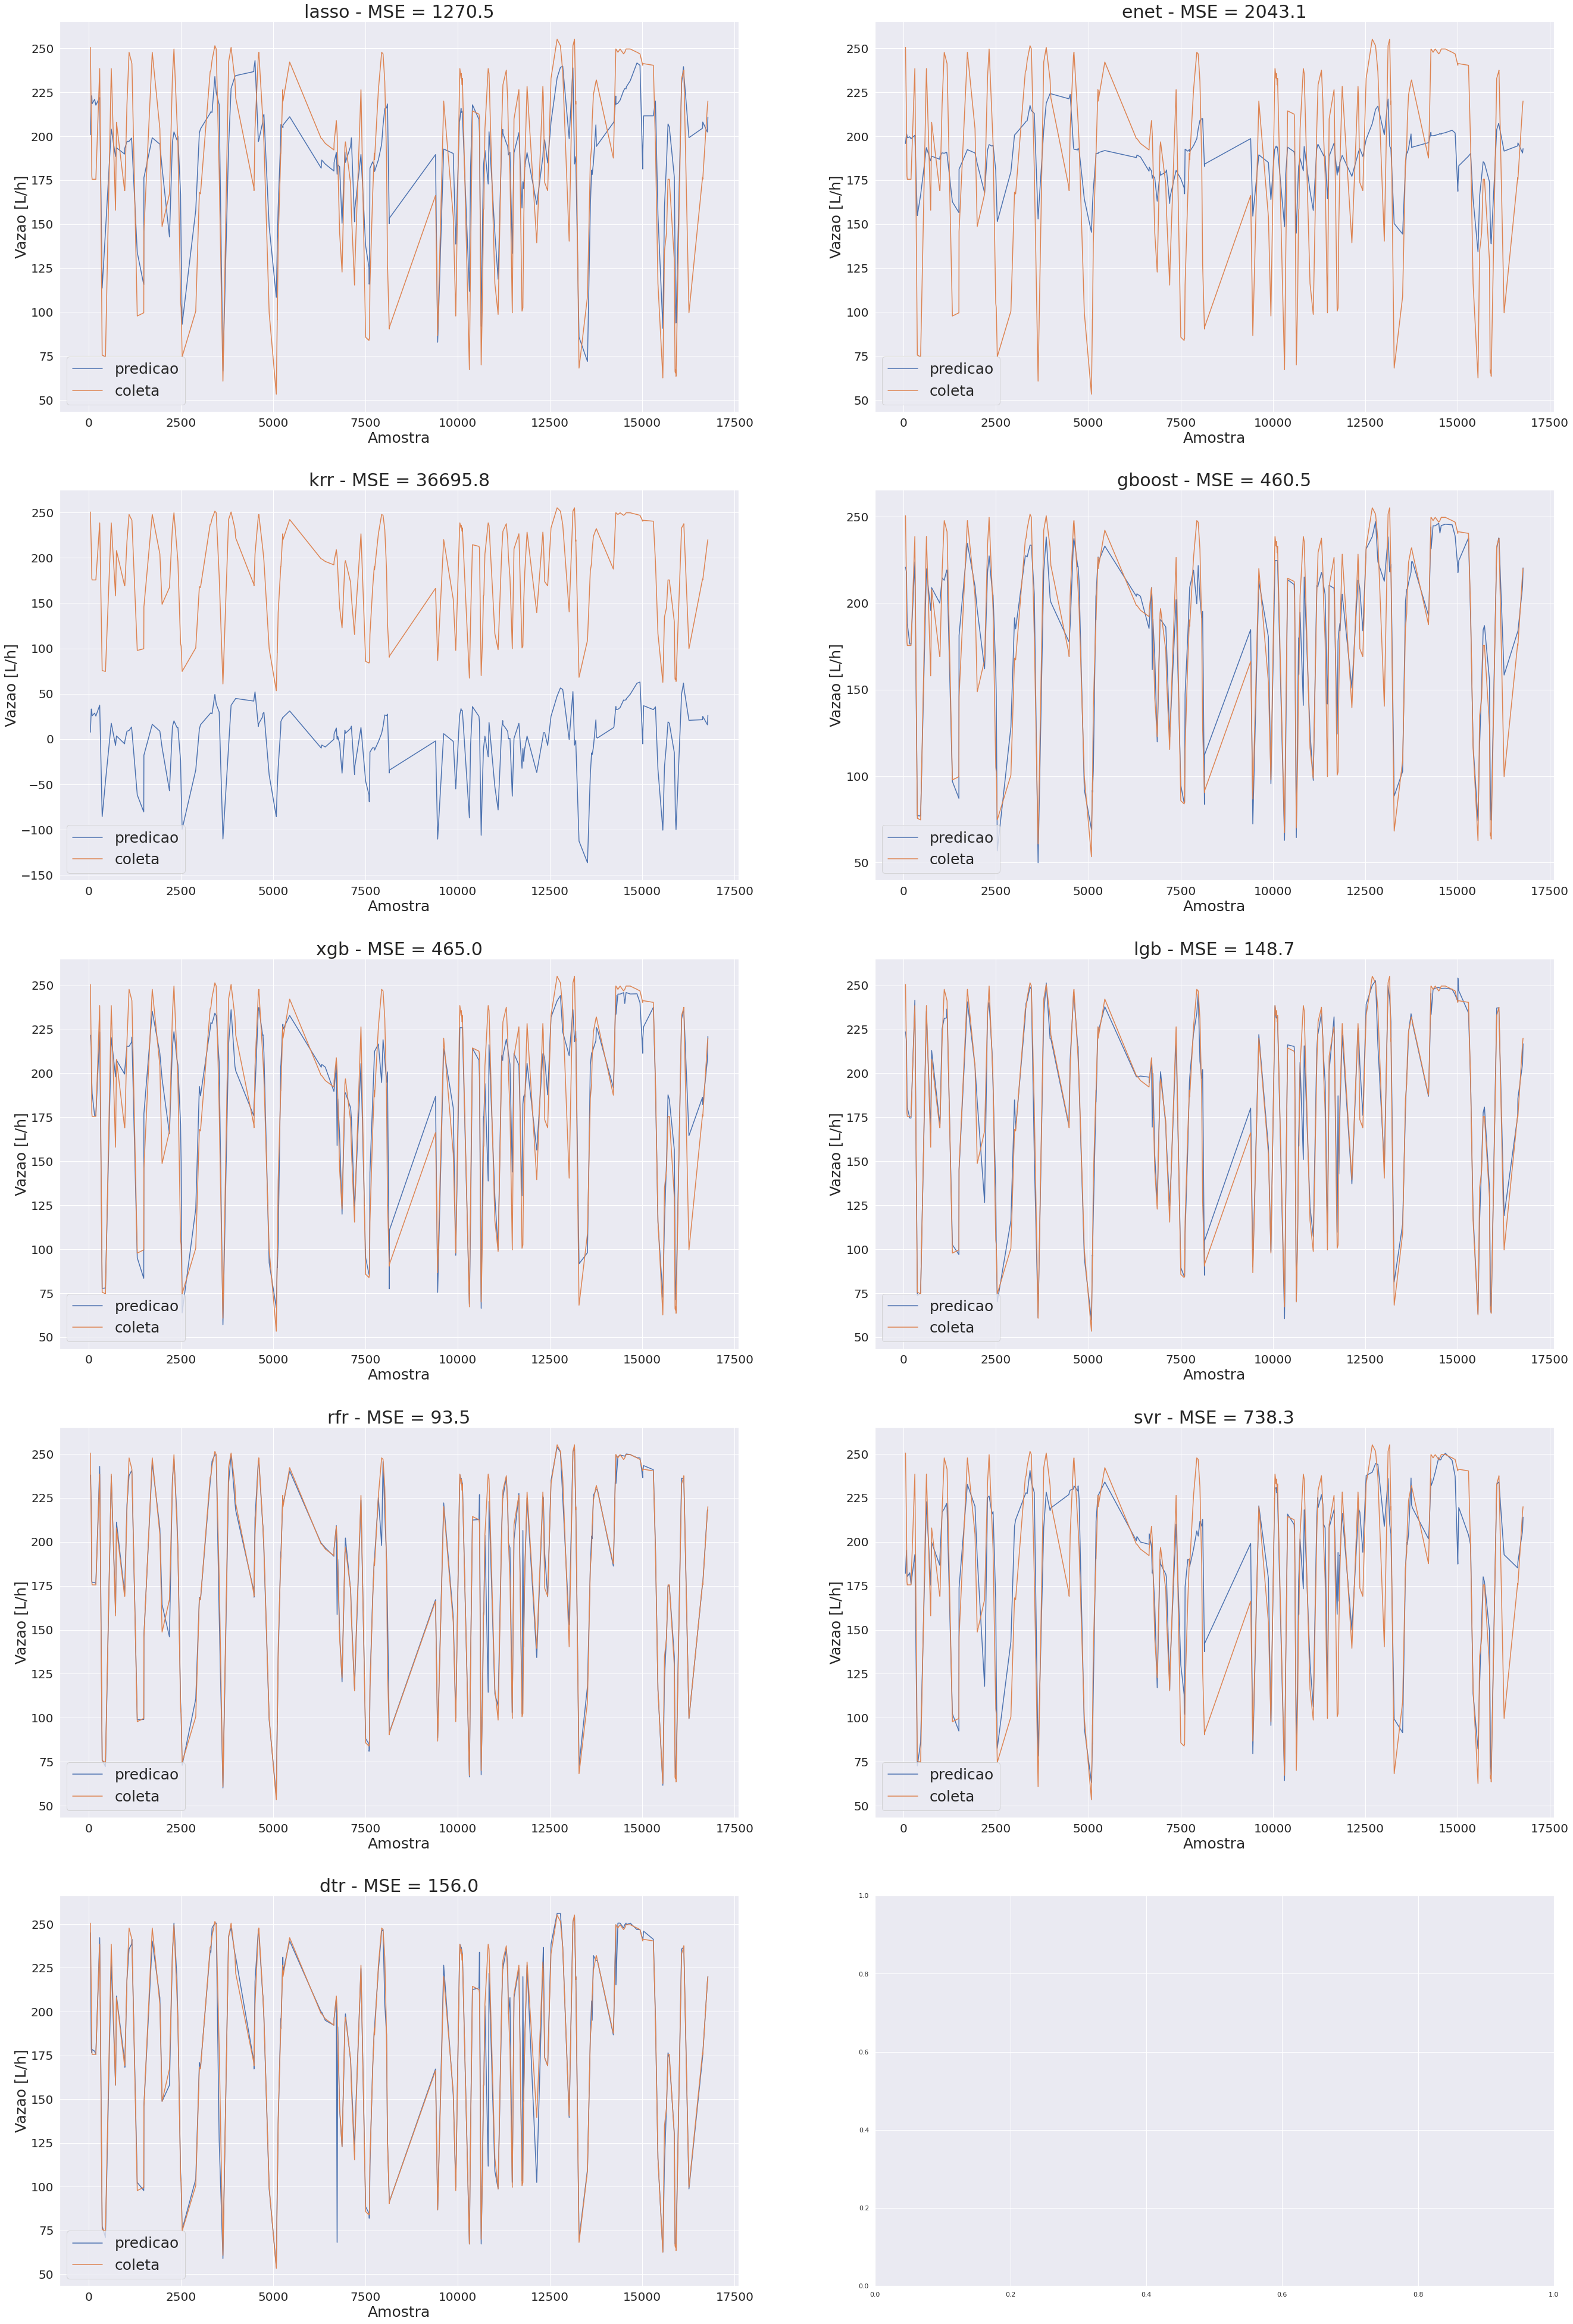

In [ ]:
#Plot de pontos de coleta e predicao

#Redução para visualizar parte aleatoria das amostras
df_predictions_plot = df_predictions.sample(n = 200).sort_index()

X_plot =    df_predictions_plot .index 
Y0_coleta = df_predictions_plot ['y_test']
Y1_lasso =  df_predictions_plot ['lasso']
Y2_enet =   df_predictions_plot ['enet']
Y3_krr =    df_predictions_plot ['krr']
Y4_gboost = df_predictions_plot ['gboost']
Y5_xgb =    df_predictions_plot ['xgb']
Y6_lgb =    df_predictions_plot ['lgb']
Y7_rfr =    df_predictions_plot ['rfr']
Y8_svr =    df_predictions_plot ['svr']
Y9_dtr =    df_predictions_plot ['dtr']

#Configuracoes de multiplas visualizacoes
figure, axis = plt.subplots(5, 2, figsize=(45,70))

#  lasso
axis[0, 0].plot(X_plot, Y1_lasso)
axis[0, 0].plot(X_plot, Y0_coleta)
axis[0, 0].set_title(f'lasso - MSE = {mse_list[0]:.1f}',fontsize=30)
axis[0, 0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 0].set_xlabel('Amostra',fontsize=25)
axis[0, 0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 0].tick_params(labelsize=20)

#  enet
axis[0, 1].plot(X_plot, Y2_enet)
axis[0, 1].plot(X_plot, Y0_coleta)
axis[0, 1].set_title(f'enet - MSE = {mse_list[1]:.1f}',fontsize=30)
axis[0, 1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 1].set_xlabel('Amostra',fontsize=25)
axis[0, 1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 1].tick_params(labelsize=20)

#  krr
axis[1,0].plot(X_plot, Y3_krr)
axis[1,0].plot(X_plot, Y0_coleta)
axis[1,0].set_title(f'krr - MSE = {mse_list[2]:.1f}',fontsize=30)
axis[1,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1,0].set_xlabel('Amostra',fontsize=25)
axis[1,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1,0].tick_params(labelsize=20)

#  gboost
axis[1,1].plot(X_plot, Y4_gboost)
axis[1,1].plot(X_plot, Y0_coleta)
axis[1,1].set_title(f'gboost - MSE = {mse_list[3]:.1f}',fontsize=30)
axis[1,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1,1].set_xlabel('Amostra',fontsize=25)
axis[1,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1,1].tick_params(labelsize=20)

#  xgb
axis[2,0].plot(X_plot, Y5_xgb)
axis[2,0].plot(X_plot, Y0_coleta)
axis[2,0].set_title(f'xgb - MSE = {mse_list[4]:.1f}',fontsize=30)
axis[2,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2,0].set_xlabel('Amostra',fontsize=25)
axis[2,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2,0].tick_params(labelsize=20)

#  lgb
axis[2,1].plot(X_plot, Y6_lgb)
axis[2,1].plot(X_plot, Y0_coleta)
axis[2,1].set_title(f'lgb - MSE = {mse_list[5]:.1f}',fontsize=30)
axis[2,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2,1].set_xlabel('Amostra',fontsize=25)
axis[2,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2,1].tick_params(labelsize=20)

#  rfr
axis[3,0].plot(X_plot, Y7_rfr)
axis[3,0].plot(X_plot, Y0_coleta)
axis[3,0].set_title(f'rfr - MSE = {mse_list[6]:.1f}',fontsize=30)
axis[3,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[3,0].set_xlabel('Amostra',fontsize=25)
axis[3,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[3,0].tick_params(labelsize=20)

#  svr
axis[3,1].plot(X_plot, Y8_svr)
axis[3,1].plot(X_plot, Y0_coleta)
axis[3,1].set_title(f'svr - MSE = {mse_list[7]:.1f}',fontsize=30)
axis[3,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[3,1].set_xlabel('Amostra',fontsize=25)
axis[3,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[3,1].tick_params(labelsize=20)

#  dtr
axis[4,0].plot(X_plot, Y9_dtr)
axis[4,0].plot(X_plot, Y0_coleta)
axis[4,0].set_title(f'dtr - MSE = {mse_list[8]:.1f}',fontsize=30)
axis[4,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[4,0].set_xlabel('Amostra',fontsize=25)
axis[4,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[4,0].tick_params(labelsize=20)


plt.show()



## **Teste de Hyperparâmetros**

## **Lasso**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# Parameter's to search

alpha = [1, 0, 0.0001, 0.001, 0.01, 0.1, 0.0005, 0.005, 0.05, 0.5, 5, 25, 50]
# Setting up parameter grid
hyperparams = {'alpha': alpha}

# Run GridSearch CV
lasso_hyperparams=RandomizedSearchCV(estimator = Lasso(), param_distributions = hyperparams, 
                verbose=3, cv=5, scoring = "neg_mean_squared_error", n_iter=1000, error_score = 0.1)

# Fitting model and return results
lasso_hyperparams.fit(X_train, y_train)
print(lasso_hyperparams.best_score_)
print(lasso_hyperparams.best_estimator_)
print(lasso_hyperparams.best_params_)
print(lasso_hyperparams.refit_time_)

#Tempo de refit: 0.032622337341308594
#Tempo estimadopara searchtotal: 1 s
# Fitting 5 folds for each of 11 candidates, totalling 55 fits
# -27.674269231769337
# Lasso(alpha=0)
# {'alpha': 0}
# 0.0619814395904541

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END .......................alpha=1;, score=-1250.782 total time=   0.0s
[CV 2/5] END .......................alpha=1;, score=-1219.335 total time=   0.0s
[CV 3/5] END .......................alpha=1;, score=-1309.401 total time=   0.0s
[CV 4/5] END .......................alpha=1;, score=-1306.936 total time=   0.0s
[CV 5/5] END .......................alpha=1;, score=-1225.484 total time=   0.0s
[CV 1/5] END .......................alpha=0;, score=-1216.694 total time=   0.1s
[CV 2/5] END .......................alpha=0;, score=-1163.096 total time=   0.1s
[CV 3/5] END .......................alpha=0;, score=-1267.467 total time=   0.1s
[CV 4/5] END .......................alpha=0;, score=-1253.781 total time=   0.1s
[CV 5/5] END .......................alpha=0;, score=-1204.588 total time=   0.1s
[CV 1/5] END ..................alpha=0.0001;, score=-1216.693 total time=   0.0s
[CV 2/5] END ..................alpha=0.0001;, sc

## **ENET**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
# Parameter's to search

alpha = [1, 0, 0.0001, 0.001, 0.01, 0.1, 0.0005, 0.005, 0.05, 0.5, 5]
l1_ratio = [0.5, 0, 0.001, 0.01, 0.1, 0.3, 0.7, 0.9, 3, 5]

# Setting up parameter grid
hyperparams = {'alpha': alpha, 'l1_ratio': l1_ratio}

# Run GridSearch CV
enet_hyperparams=RandomizedSearchCV(estimator = enet, param_distributions = hyperparams, 
                verbose=3, cv=5, scoring = "neg_mean_squared_error", n_iter=10000)

# Fitting model and return results
enet_hyperparams.fit(X_train, y_train)
print(enet_hyperparams.best_score_)
print(enet_hyperparams.best_estimator_)
print(enet_hyperparams.best_params_)
print(enet_hyperparams.refit_time_)
#Tempo de refit: 0.1575639247894287
#Tempo estimado: 10 s

# Fitting 5 folds for each of 110 candidates, totalling 550 fits
# -27.674269231769337
# ElasticNet(alpha=0)
# {'l1_ratio': 0.5, 'alpha': 0}
# 0.06128740310668945

Fitting 5 folds for each of 110 candidates, totalling 550 fits
[CV 1/5] END .........alpha=1, l1_ratio=0.5;, score=-2094.340 total time=   0.0s
[CV 2/5] END .........alpha=1, l1_ratio=0.5;, score=-2079.687 total time=   0.0s
[CV 3/5] END .........alpha=1, l1_ratio=0.5;, score=-2104.803 total time=   0.0s
[CV 4/5] END .........alpha=1, l1_ratio=0.5;, score=-2097.008 total time=   0.0s
[CV 5/5] END .........alpha=1, l1_ratio=0.5;, score=-1946.819 total time=   0.0s
[CV 1/5] END ...........alpha=1, l1_ratio=0;, score=-2439.202 total time=   0.1s
[CV 2/5] END ...........alpha=1, l1_ratio=0;, score=-2403.809 total time=   0.1s
[CV 3/5] END ...........alpha=1, l1_ratio=0;, score=-2419.685 total time=   0.1s
[CV 4/5] END ...........alpha=1, l1_ratio=0;, score=-2409.858 total time=   0.1s
[CV 5/5] END ...........alpha=1, l1_ratio=0;, score=-2259.638 total time=   0.1s
[CV 1/5] END .......alpha=1, l1_ratio=0.001;, score=-2438.736 total time=   0.0s
[CV 2/5] END .......alpha=1, l1_ratio=0.001;, 

## **KRR**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html
# Parameter's to search

alpha = [1, 0, 0.01, 0.1, 5]
kernel = ['linear', 'polynomial', 'rbf']
gamma = [None, 0.01, 0.1, 1, 10, 100]
coef0 = [0.5, 0, 0.1, 0.3, 0.7, 0.9, 5]

# Setting up parameter grid
hyperparams = {'alpha': alpha, 'kernel': kernel, 'gamma': gamma, 'coef0': coef0}

# Run GridSearch CV
krr_hyperparams=RandomizedSearchCV(estimator = krr, param_distributions = hyperparams, 
                verbose=3, cv=3, scoring = "neg_mean_squared_error", n_iter=1)

# Fitting model and return results
krr_hyperparams.fit(X_train, y_train)
print(krr_hyperparams.best_score_)
print(krr_hyperparams.best_estimator_)
print(krr_hyperparams.best_params_)
print(krr_hyperparams.refit_time_)
#Tempo de refit: 21.09510326385498
#Tempo estimado: 620 x 21 = 18 horas

# Fitting 5 folds for each of 30 candidates, totalling 150 fits
# -7.1977178148296375
# KernelRidge(alpha=0.1, coef0=0.1, gamma=1, kernel='rbf')
# {'kernel': 'rbf', 'gamma': 1, 'coef0': 0.1, 'alpha': 0.1}
# 15.433153629302979

## **XGB**

In [ ]:
#https://xgboost.readthedocs.io/en/stable/python/python_api.html
# Parameter's to search


colsample_bytree = [None, 0, 1, 5, 10]
reg_alpha = [None, 0, 0.3, 0.6, 1]
learning_rate = [1, 0.001, 0.01, 0.1, 0.5]
gamma = [None, 0.01, 0.1, 1, 10, 100]
n_estimators = [100, 250, 500, 1000,  2500]




# Setting up parameter grid
hyperparams = {'colsample_bytree': colsample_bytree, 'reg_alpha': reg_alpha, 'learning_rate': learning_rate, 'gamma': gamma, 'n_estimators' :n_estimators}

# Run GridSearch CV
model_xgb_hyperparams=RandomizedSearchCV(estimator = model_xgb, param_distributions = hyperparams, 
                verbose=3, cv=3, scoring = "neg_mean_squared_error", n_iter=10000)

# Fitting model and return results
model_xgb_hyperparams.fit(X_train, y_train)
print(model_xgb_hyperparams.best_score_)
print(model_xgb_hyperparams.best_estimator_)
print(model_xgb_hyperparams.best_params_)
print(model_xgb_hyperparams.refit_time_)
#Tempo de refit: 3.6522560119628906
#Tempo estimado: 12500 x 2.6 = 15 horas

# -9.445404572155393
# XGBRegressor(gamma=0.01, learning_rate=0.5, reg_alpha=0.6)
# {'reg_alpha': 0.6, 'learning_rate': 0.5, 'gamma': 0.01, 'colsample_bytree': 1}
# 0.345731258392334

Streaming output truncated to the last 5000 lines.
[CV 2/3] END colsample_bytree=5, gamma=100, learning_rate=0.001, n_estimators=1000, reg_alpha=0.3;, score=nan total time=   0.0s
[06:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END colsample_bytree=5, gamma=100, learning_rate=0.001, n_estimators=1000, reg_alpha=0.3;, score=nan total time=   0.0s
[06:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END colsample_bytree=5, gamma=100, learning_rate=0.001, n_estimators=1000, reg_alpha=0.6;, score=nan total time=   0.0s
[06:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END colsample_bytree=5, gamma=100, learning_rate=0.001, n_estimators=1000, reg_alpha=0.6;, score=nan total time=   0.0s
[06:13:44] WARNING: /workspace/src/objective/regress

## **LGB**

In [ ]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
# Parameter's to search

objective = ['regression','root_mean_squared_error']
learning_rate = [0.1, 0.001, 0.01, 0.5, 1]
num_leaves = [31, 7, 15]
max_depth = [-1, 3, 10, 25]

# Setting up parameter grid
hyperparams = {'objective': objective, 'learning_rate': learning_rate, 'num_leaves': num_leaves, 'max_depth': max_depth}

# Run GridSearch CV
model_lgb_hyperparams=RandomizedSearchCV(estimator = model_lgb, param_distributions = hyperparams, 
                verbose=3, cv=3, scoring = "neg_mean_squared_error", n_iter=1000)

# Fitting model and return results
model_lgb_hyperparams.fit(X_train, y_train)
print(model_lgb_hyperparams.best_score_)
print(model_lgb_hyperparams.best_estimator_)
print(model_lgb_hyperparams.best_params_)
print(model_lgb_hyperparams.refit_time_)
#Tempo de refit: 0.16626811027526855
#Tempo estimado: 600 x 0,03 = 18s

# Fitting 5 folds for each of 120 candidates, totalling 600 fits
# -6.620638622378034
# LGBMRegressor(learning_rate=0.5, objective='regression')
# {'objective': 'regression', 'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.5}
# 0.13453388214111328

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=regression;, score=-148.557 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=regression;, score=-170.093 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=regression;, score=-171.395 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=root_mean_squared_error;, score=-148.557 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=root_mean_squared_error;, score=-170.093 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=-1, num_leaves=31, objective=root_mean_squared_error;, score=-171.395 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=-1, num_leaves=7, objective=regression;, score=-395.601 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=-1, num_leaves=7, objective=reg

## **SVR**

In [ ]:
#SVR
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
C = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gamma = ['scale','auto']

hyperparams = {'C': C, 'gamma' : gamma}

# Run GridSearch CV
svr_hyperparams=RandomizedSearchCV(estimator = SVR(), param_distributions = hyperparams, 
                verbose=3, cv=3, scoring = "neg_mean_squared_error", n_iter=10000)


# Fitting model and return results
svr_hyperparams.fit(X_train, y_train)
print(svr_hyperparams.best_score_)
print(svr_hyperparams.best_estimator_)
print(svr_hyperparams.best_params_)
print(svr_hyperparams.refit_time_)
#Tempo de refit: 8.262

# Fitting 5 folds for each of 20 candidates, totalling 100 fits
# -10.748773332966877
# SVR(C=100)
# {'gamma': 'scale', 'C': 100}
# 6.3441994190216064

Fitting 5 folds for each of 20 candidates, totalling 100 fits
-10.748773332966877
SVR(C=100)
{'gamma': 'scale', 'C': 100}
6.3441994190216064


## **DTR**

In [ ]:
#DTR
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

max_depth = [None, 3]
max_features = [None, 1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 3, 5, 8, 10]
hyperparams = {'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

#GridSearchCV
dtr_hyperparams=RandomizedSearchCV(estimator = dtr, param_distributions = hyperparams, 
                verbose=3, cv=3, scoring = "neg_mean_squared_error", n_iter=15000)

#resultados
dtr_hyperparams.fit(X_train, y_train)
print(dtr_hyperparams.best_score_)
print(dtr_hyperparams.best_estimator_)
print(dtr_hyperparams.best_params_)
print(dtr_hyperparams.refit_time_)
#Tempo de refit: 0.0102

# Fitting 5 folds for each of 250 candidates, totalling 1250 fits
# -5.019236072572113
# DecisionTreeRegressor()
# {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
# 0.04495573043823242

Fitting 3 folds for each of 250 candidates, totalling 750 fits
[CV 1/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=-183.954 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=-237.687 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=-248.377 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4;, score=-194.703 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4;, score=-231.462 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4;, score=-252.144 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6;, score=-172.675 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=None, min_samples_leaf=1, m

## **GBR**

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# Parameter's to search
learning_rate = [0.1, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gbr_hyperparams=RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = hyperparams, 
                verbose=True, cv=3, scoring = "neg_mean_squared_error", n_iter=100)

# Fitting model and return results
gbr_hyperparams.fit(X_train, y_train)
print(gbr_hyperparams.best_score_)
print(gbr_hyperparams.best_estimator_)
print(gbr_hyperparams.best_params_)
print(gbr_hyperparams.refit_time_)
#Tempo de refit: 8.161061525344849
#Tempo estimado: 3 horas

# Fitting 5 folds for each of 56 candidates, totalling 280 fits
# -6.426526780027975
# GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)
# {'n_estimators': 1500, 'learning_rate': 0.2}
# 13.494999647140503

Fitting 3 folds for each of 56 candidates, totalling 168 fits
-128.06720059181507
GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)
{'n_estimators': 1500, 'learning_rate': 0.2}
13.716099739074707


## **RFR**

In [ ]:


#rfr
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Parameter's to search
n_estimators = [100, 10, 25, 50, 75]
max_depth = [None, 2]
max_features = ['sqrt', 'log2', None]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 3, 5, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
rfr_hyperparameters=RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = hyperparams, 
                verbose=1, cv=5, scoring = "neg_mean_squared_error",n_iter=100000)

# Fitting model and return results
rfr_hyperparameters.fit(X_train, y_train)
print(rfr_hyperparameters.best_score_)
print(rfr_hyperparameters.best_estimator_)
print(rfr_hyperparameters.best_params_)
print(rfr_hyperparameters.refit_time_)



# Fitting 5 folds for each of 750 candidates, totalling 3750 fits
# -4.73022331526427
# RandomForestRegressor(max_features=None, n_estimators=75)
# {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
# 2.2576982975006104

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
-102.84400798544297
RandomForestRegressor(max_features='log2', n_estimators=75)
{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
1.1975255012512207


## **Treino com parâmetros obtidos após Randomized Search CV**

In [ ]:
#Foco em Mean Absolute Error
lasso = Lasso(alpha=0.005)

enet = ElasticNet(alpha=0)

krr = KernelRidge(alpha=0.1, coef0=0.1, gamma=1, kernel='rbf')

gboost = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)

model_xgb = xgb.XGBRegressor(gamma=0.01, learning_rate=0.5, reg_alpha=0.6)

model_lgb = lgb.LGBMRegressor(learning_rate=0.5, objective='regression')

rfr = RandomForestRegressor(max_features='sqrt',n_estimators=300)

svr = SVR(C=100)

dtr = DecisionTreeRegressor()

In [ ]:
#Foco em Mean Squared Error
lasso = Lasso(alpha=0)

enet = ElasticNet(alpha=0.0005)

krr = KernelRidge(alpha=0.1, coef0=0.1, gamma=1, kernel='rbf')

gboost = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)

model_xgb = xgb.XGBRegressor(gamma=0.1, learning_rate=0.5, n_estimators=2500, reg_alpha=1)

model_lgb = lgb.LGBMRegressor(learning_rate=0.5, objective='regression')

rfr = RandomForestRegressor(max_features='log2', n_estimators=1000)

svr = SVR(C=100)

dtr = DecisionTreeRegressor(min_samples_split=8)

In [ ]:
#Treinamento de modelos

predict_lasso = []
predict_enet = []
predict_krr = []
predict_gboost = []
predict_xgb = []
predict_lgb = []
predict_rfr = []
predict_svr = []
predict_dtr = []

predictions_list = [predict_lasso,predict_enet,predict_krr,predict_gboost,predict_xgb,predict_lgb,predict_rfr,predict_svr,predict_dtr]

models_list = [lasso,enet,krr,gboost,model_xgb,model_lgb,rfr,svr,dtr]

answers_predictions_list = []

for model in models_list:
    model.fit(X_train, y_train)
    
    answers_predictions_list.append(model.predict(X_test))

#Resultados de predicao de corrente quente armazenados em um dataframe df_predictions
df_predictions = {
    "lasso":  answers_predictions_list[0],
    "enet":   answers_predictions_list[1],
    "krr":    answers_predictions_list[2],
    "gboost": answers_predictions_list[3],
    "xgb":    answers_predictions_list[4],
    "lgb":    answers_predictions_list[5],
    "rfr":    answers_predictions_list[6],
    "svr":    answers_predictions_list[7],
    "dtr":    answers_predictions_list[8],
    "y_test": y_test
}

df_predictions = pd.DataFrame(df_predictions)
df_predictions

[01:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


lasso        enet         krr      gboost         xgb         lgb  \
6443   177.936203  177.986587  196.789680  196.912903  196.043152  197.012303   
11212  204.278278  204.255987  221.850711  222.185706  225.810898  231.464192   
14491  231.127277  231.060475  250.503187  250.435751  248.642883  249.594558   
1554   190.307326  190.334875  185.643637  188.421217  186.078232  196.031069   
6231   183.394862  183.421459  198.320980  202.592885  197.844238  194.774084   
...           ...         ...         ...         ...         ...         ...   
11814  178.282973  178.326830  179.324511  179.316130  181.605377  173.684000   
9907   158.078552  158.108554  126.494708  129.661821  122.329559  119.105147   
3353   216.659317  216.628816  241.158203  243.315757  244.323517  242.051138   
15026  227.135741  227.050052  240.389103  243.728501  251.033722  242.003188   
11665  203.966387  203.943144  216.305636  204.930961  200.070801  192.921904   

              rfr         svr         dtr      y_test  
6443   196.506975  194.904477  196.171846  199.610235  
11212  223.384576  219.352198  227.150405  227.381835  
14491  248.837247  252.449319  247.516245  246.821955  
1554   186.150266  187.437153  185.107288  182.021555  
6231   199.193661  198.313223  198.993088  198.684515  
...           ...         ...         ...         ...  
11814  182.015075  175.844957  182.021555  182.021555  
9907   119.878897  132.085525  157.027115  100.558195  
3353   244.913120  236.349619  247.284815  244.970515  
15026  242.005434  243.877948  242.325601  243.119075  
11665  202.104125  219.673189  201.197184  200.535955  

[3203 rows x 10 columns]

In [ ]:
#Calculo do MSE(Mean Square Error) e MAE (Mean Absolute Error) de cada modelo
mse_list = []
mae_list = []

for k in answers_predictions_list:
    mse_list.append(mean_squared_error(k,df_predictions["y_test"]))

for k in answers_predictions_list:
    mae_list.append(mean_absolute_error(k,df_predictions["y_test"]))


error_dictionary = {
  "lasso":  [mse_list[0],mae_list[0]],
  "enet":   [mse_list[1],mae_list[1]],
  "krr":    [mse_list[2],mae_list[2]],
  "gboost": [mse_list[3],mae_list[3]],
  "xgb":    [mse_list[4],mae_list[4]],
  "lgb":    [mse_list[5],mae_list[5]],
  "rfr":    [mse_list[6],mae_list[6]],
  "svr":    [mse_list[7],mae_list[7]],
  "dtr":    [mse_list[8],mae_list[8]]
}


df_error = pd.DataFrame(error_dictionary,index = ['MSE', 'MAE'])
df_error

lasso         enet         krr      gboost        xgb         lgb  \
MSE  1225.735105  1225.794139  155.045970  120.128211  96.744399  111.710809   
MAE    27.533760    27.546016    7.049696    6.360859   5.784894    6.201589   

           rfr         svr         dtr  
MSE  81.956028  372.758303  164.979999  
MAE   4.483546   10.227174    4.582664

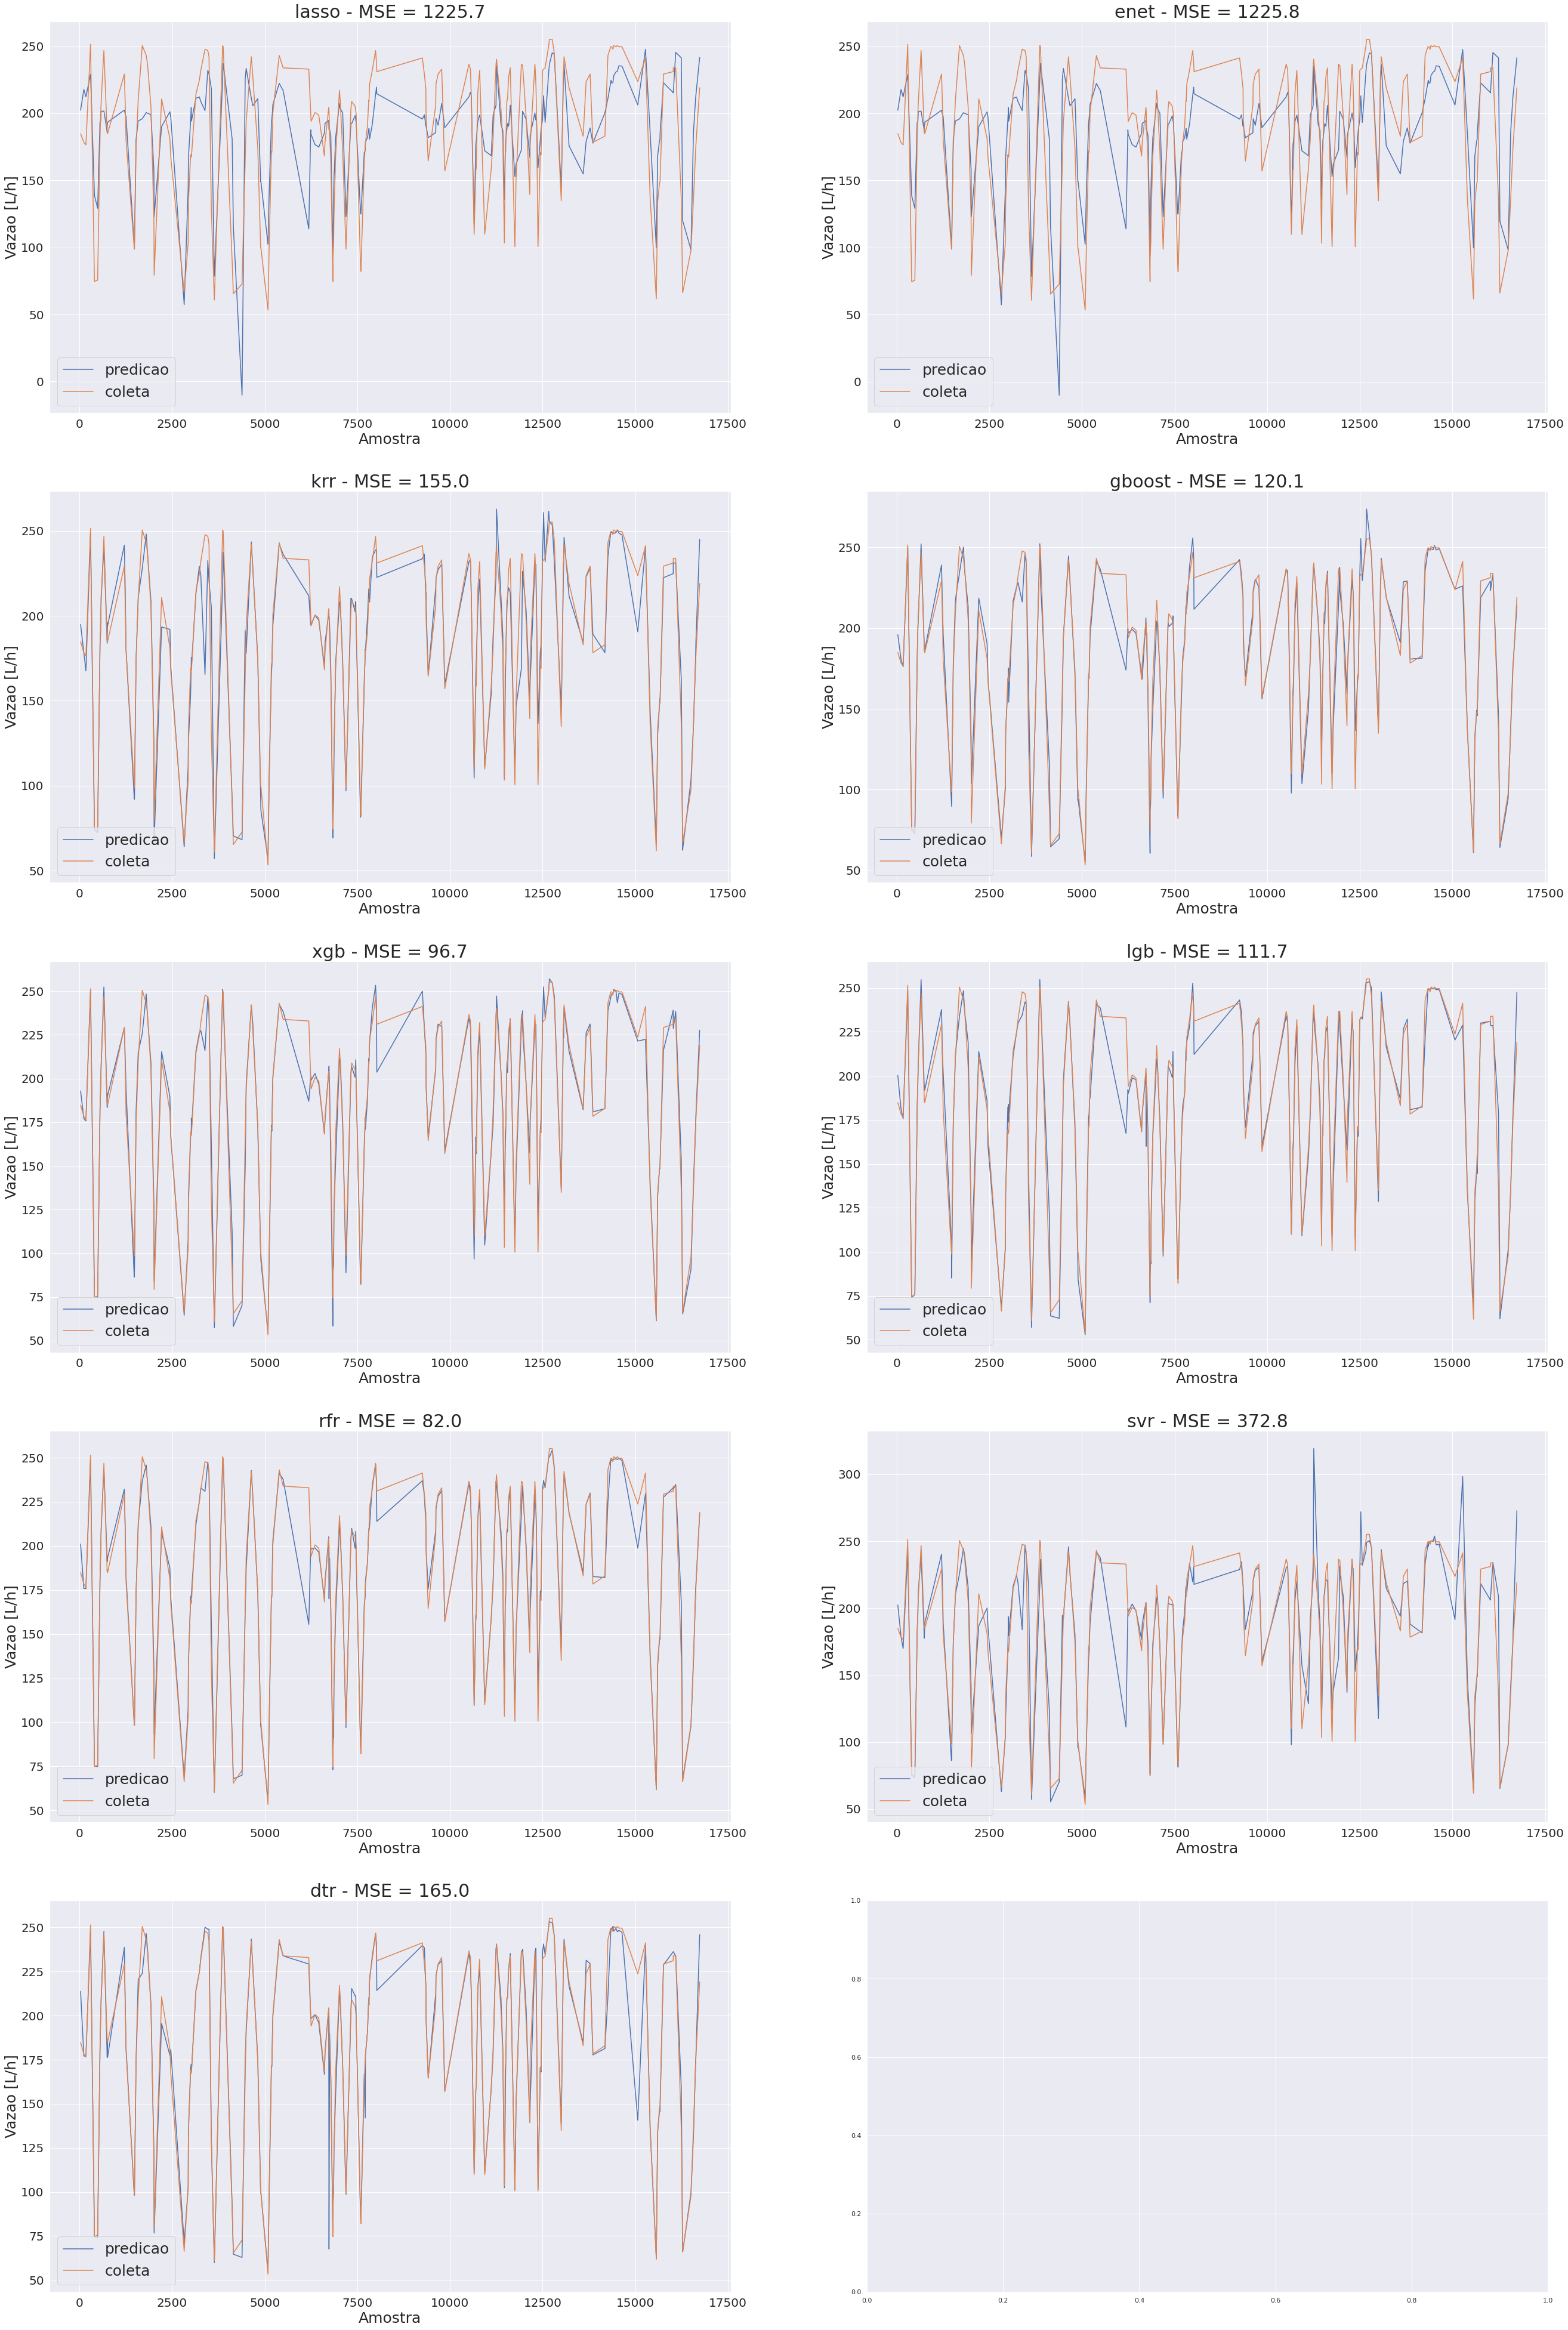

In [ ]:
#Plot de pontos de coleta e predicao

#Redução para visualizar parte aleatoria das amostras
df_predictions_plot = df_predictions.sample(n = 200).sort_index()

X_plot =    df_predictions_plot .index 
Y0_coleta = df_predictions_plot ['y_test']
Y1_lasso =  df_predictions_plot ['lasso']
Y2_enet =   df_predictions_plot ['enet']
Y3_krr =    df_predictions_plot ['krr']
Y4_gboost = df_predictions_plot ['gboost']
Y5_xgb =    df_predictions_plot ['xgb']
Y6_lgb =    df_predictions_plot ['lgb']
Y7_rfr =    df_predictions_plot ['rfr']
Y8_svr =    df_predictions_plot ['svr']
Y9_dtr =    df_predictions_plot ['dtr']

#Configuracoes de multiplas visualizacoes
figure, axis = plt.subplots(5, 2, figsize=(45,70))

#  lasso
axis[0, 0].plot(X_plot, Y1_lasso)
axis[0, 0].plot(X_plot, Y0_coleta)
axis[0, 0].set_title(f'lasso - MSE = {mse_list[0]:.1f}',fontsize=30)
axis[0, 0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 0].set_xlabel('Amostra',fontsize=25)
axis[0, 0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 0].tick_params(labelsize=20)

#  enet
axis[0, 1].plot(X_plot, Y2_enet)
axis[0, 1].plot(X_plot, Y0_coleta)
axis[0, 1].set_title(f'enet - MSE = {mse_list[1]:.1f}',fontsize=30)
axis[0, 1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 1].set_xlabel('Amostra',fontsize=25)
axis[0, 1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 1].tick_params(labelsize=20)

#  krr
axis[1,0].plot(X_plot, Y3_krr)
axis[1,0].plot(X_plot, Y0_coleta)
axis[1,0].set_title(f'krr - MSE = {mse_list[2]:.1f}',fontsize=30)
axis[1,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1,0].set_xlabel('Amostra',fontsize=25)
axis[1,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1,0].tick_params(labelsize=20)

#  gboost
axis[1,1].plot(X_plot, Y4_gboost)
axis[1,1].plot(X_plot, Y0_coleta)
axis[1,1].set_title(f'gboost - MSE = {mse_list[3]:.1f}',fontsize=30)
axis[1,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1,1].set_xlabel('Amostra',fontsize=25)
axis[1,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1,1].tick_params(labelsize=20)

#  xgb
axis[2,0].plot(X_plot, Y5_xgb)
axis[2,0].plot(X_plot, Y0_coleta)
axis[2,0].set_title(f'xgb - MSE = {mse_list[4]:.1f}',fontsize=30)
axis[2,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2,0].set_xlabel('Amostra',fontsize=25)
axis[2,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2,0].tick_params(labelsize=20)

#  lgb
axis[2,1].plot(X_plot, Y6_lgb)
axis[2,1].plot(X_plot, Y0_coleta)
axis[2,1].set_title(f'lgb - MSE = {mse_list[5]:.1f}',fontsize=30)
axis[2,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2,1].set_xlabel('Amostra',fontsize=25)
axis[2,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2,1].tick_params(labelsize=20)

#  rfr
axis[3,0].plot(X_plot, Y7_rfr)
axis[3,0].plot(X_plot, Y0_coleta)
axis[3,0].set_title(f'rfr - MSE = {mse_list[6]:.1f}',fontsize=30)
axis[3,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[3,0].set_xlabel('Amostra',fontsize=25)
axis[3,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[3,0].tick_params(labelsize=20)

#  svr
axis[3,1].plot(X_plot, Y8_svr)
axis[3,1].plot(X_plot, Y0_coleta)
axis[3,1].set_title(f'svr - MSE = {mse_list[7]:.1f}',fontsize=30)
axis[3,1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[3,1].set_xlabel('Amostra',fontsize=25)
axis[3,1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[3,1].tick_params(labelsize=20)

#  dtr
axis[4,0].plot(X_plot, Y9_dtr)
axis[4,0].plot(X_plot, Y0_coleta)
axis[4,0].set_title(f'dtr - MSE = {mse_list[8]:.1f}',fontsize=30)
axis[4,0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[4,0].set_xlabel('Amostra',fontsize=25)
axis[4,0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[4,0].tick_params(labelsize=20)


plt.show()


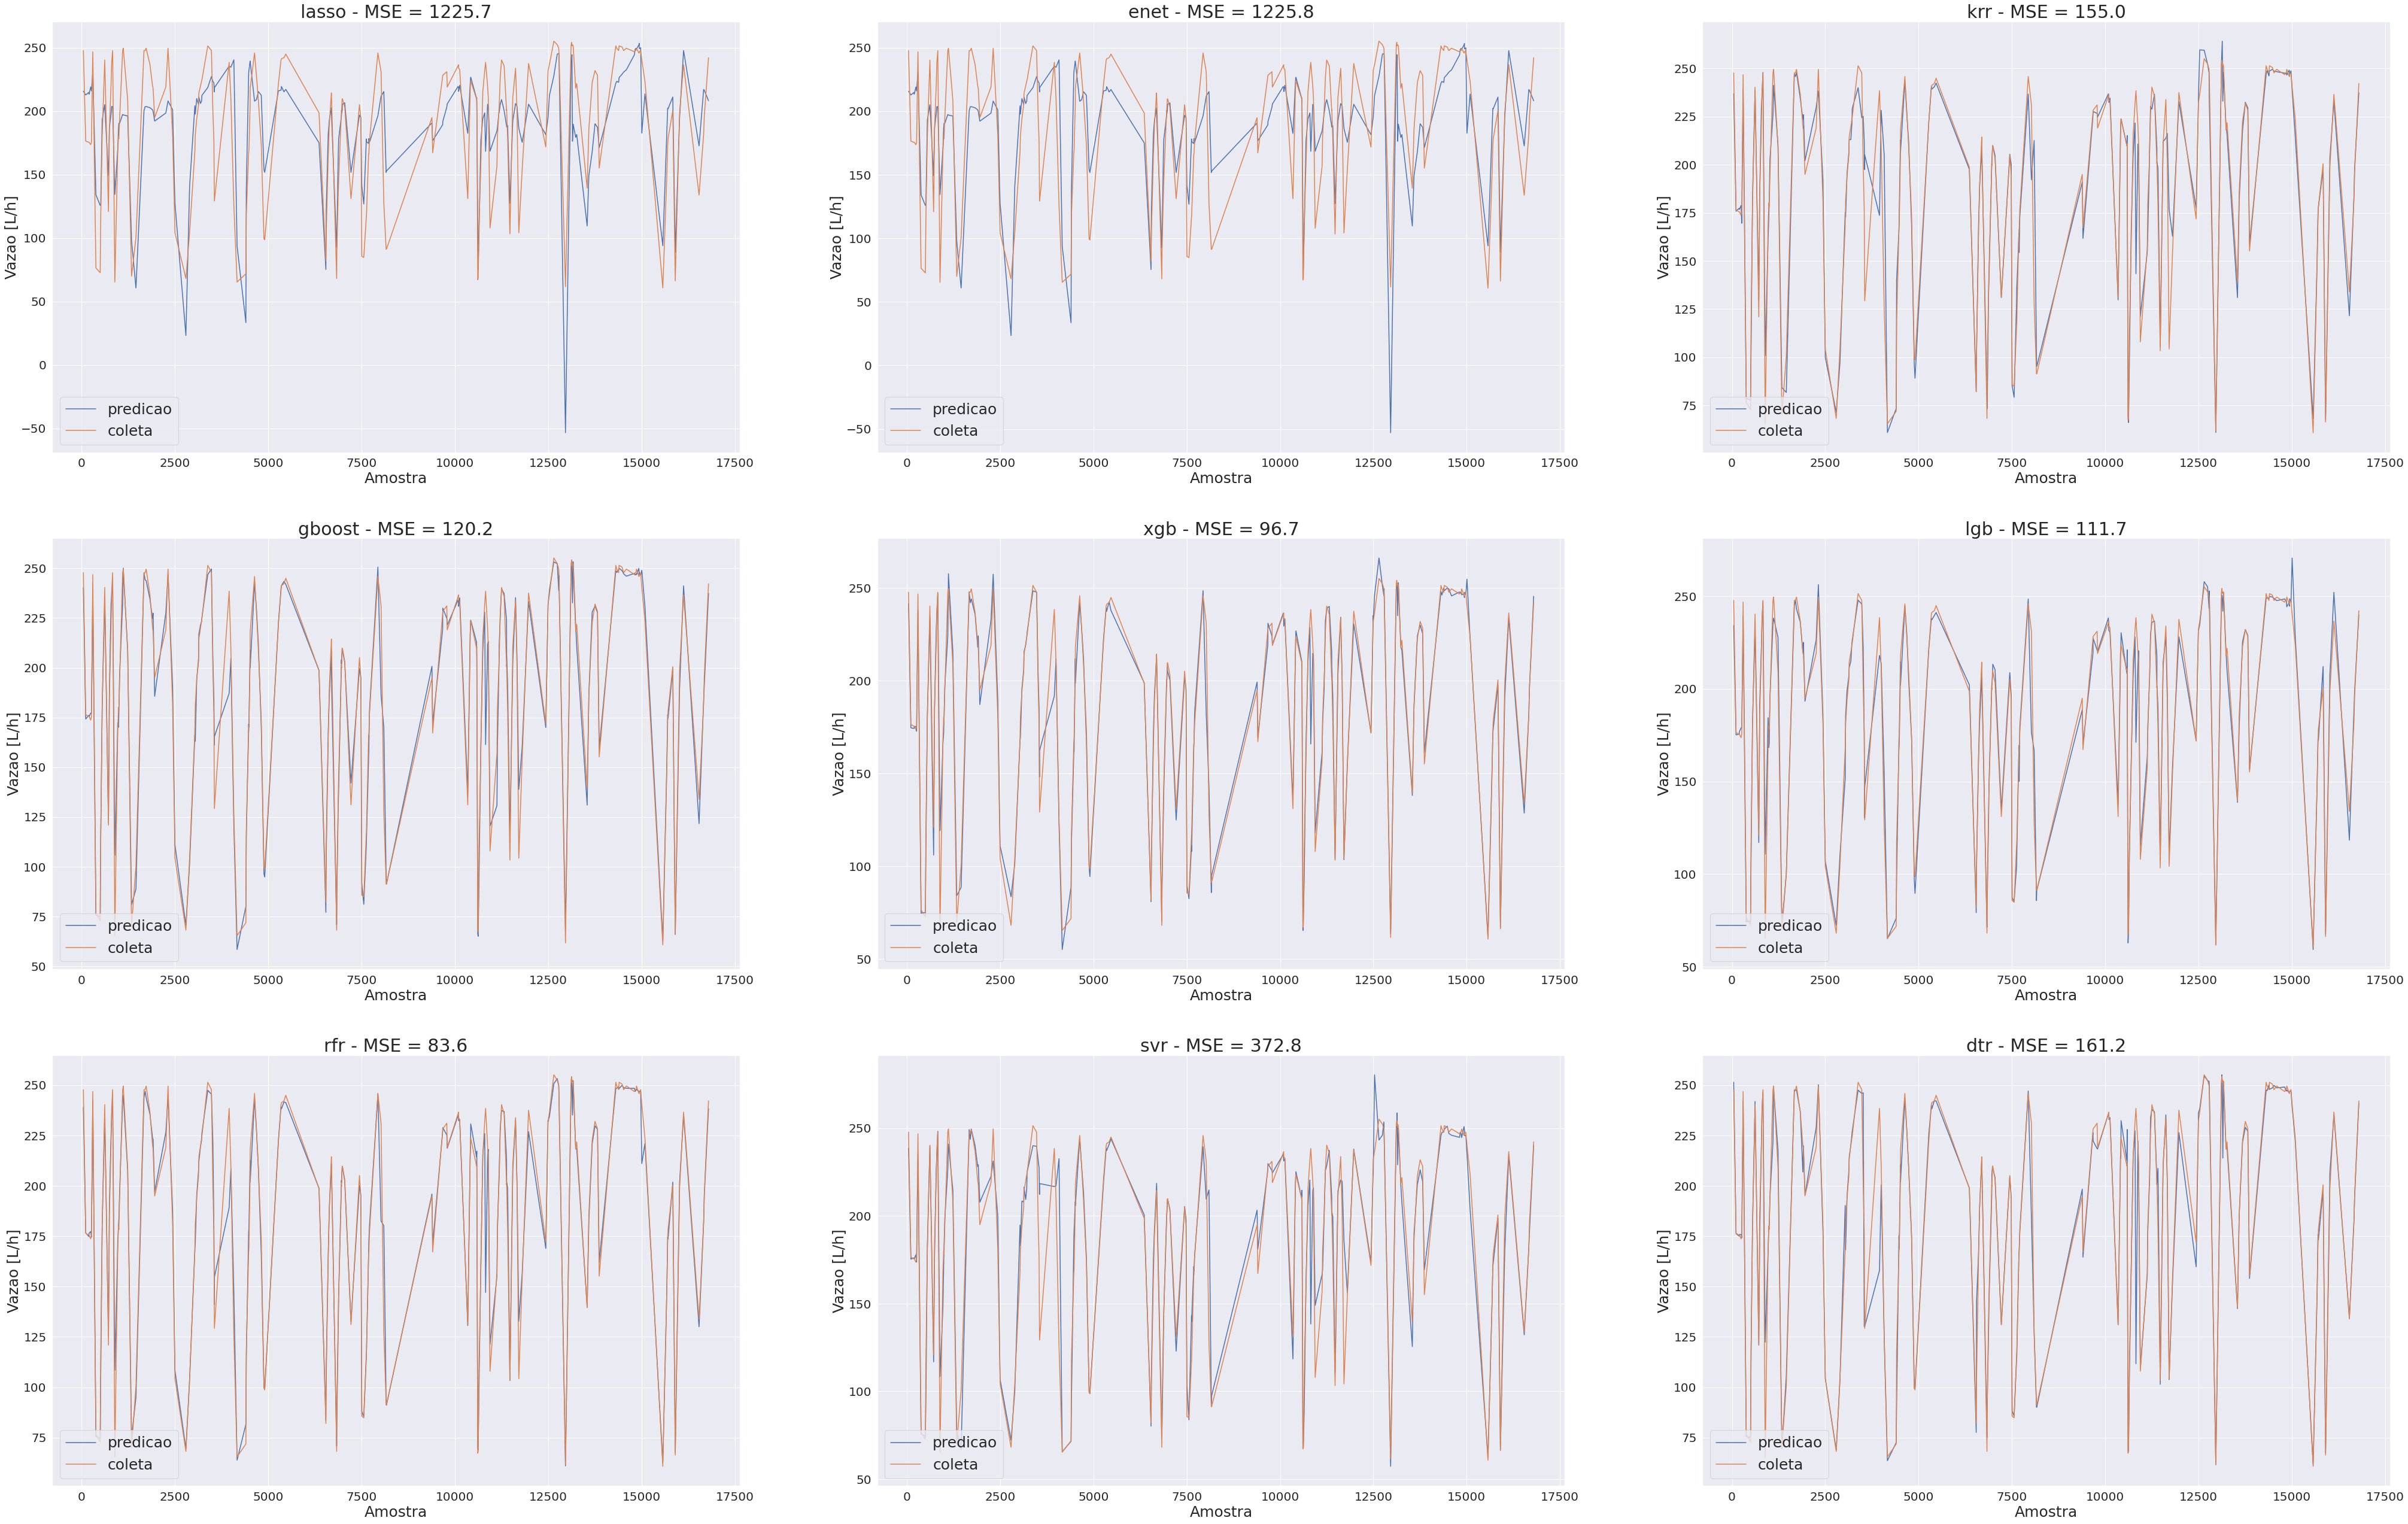

In [ ]:
#Plot de pontos de coleta e predicao

#Redução para visualizar parte aleatoria das amostras
df_predictions_plot = df_predictions.sample(n = 200).sort_index()

X_plot =    df_predictions_plot .index 
Y0_coleta = df_predictions_plot ['y_test']
Y1_lasso =  df_predictions_plot ['lasso']
Y2_enet =   df_predictions_plot ['enet']
Y3_krr =    df_predictions_plot ['krr']
Y4_gboost = df_predictions_plot ['gboost']
Y5_xgb =    df_predictions_plot ['xgb']
Y6_lgb =    df_predictions_plot ['lgb']
Y7_rfr =    df_predictions_plot ['rfr']
Y8_svr =    df_predictions_plot ['svr']
Y9_dtr =    df_predictions_plot ['dtr']

#Configuracoes de multiplas visualizacoes
figure, axis = plt.subplots(3, 3, figsize=(70,45))

#  lasso
axis[0, 0].plot(X_plot, Y1_lasso)
axis[0, 0].plot(X_plot, Y0_coleta)
axis[0, 0].set_title(f'lasso - MSE = {mse_list[0]:.1f}',fontsize=30)
axis[0, 0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 0].set_xlabel('Amostra',fontsize=25)
axis[0, 0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 0].tick_params(labelsize=20)

#  enet
axis[0, 1].plot(X_plot, Y2_enet)
axis[0, 1].plot(X_plot, Y0_coleta)
axis[0, 1].set_title(f'enet - MSE = {mse_list[1]:.1f}',fontsize=30)
axis[0, 1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 1].set_xlabel('Amostra',fontsize=25)
axis[0, 1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 1].tick_params(labelsize=20)

#  krr
axis[0, 2].plot(X_plot, Y3_krr)
axis[0, 2].plot(X_plot, Y0_coleta)
axis[0, 2].set_title(f'krr - MSE = {mse_list[2]:.1f}',fontsize=30)
axis[0, 2].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[0, 2].set_xlabel('Amostra',fontsize=25)
axis[0, 2].set_ylabel('Vazao [L/h]',fontsize=25)
axis[0, 2].tick_params(labelsize=20)

#  gboost
axis[1, 0].plot(X_plot, Y4_gboost)
axis[1, 0].plot(X_plot, Y0_coleta)
axis[1, 0].set_title(f'gboost - MSE = {mse_list[3]:.1f}',fontsize=30)
axis[1, 0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1, 0].set_xlabel('Amostra',fontsize=25)
axis[1, 0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1, 0].tick_params(labelsize=20)

#  xgb
axis[1, 1].plot(X_plot, Y5_xgb)
axis[1, 1].plot(X_plot, Y0_coleta)
axis[1, 1].set_title(f'xgb - MSE = {mse_list[4]:.1f}',fontsize=30)
axis[1, 1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1, 1].set_xlabel('Amostra',fontsize=25)
axis[1, 1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1, 1].tick_params(labelsize=20)

#  lgb
axis[1, 2].plot(X_plot, Y6_lgb)
axis[1, 2].plot(X_plot, Y0_coleta)
axis[1, 2].set_title(f'lgb - MSE = {mse_list[5]:.1f}',fontsize=30)
axis[1, 2].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[1, 2].set_xlabel('Amostra',fontsize=25)
axis[1, 2].set_ylabel('Vazao [L/h]',fontsize=25)
axis[1, 2].tick_params(labelsize=20)

#  rfr
axis[2, 0].plot(X_plot, Y7_rfr)
axis[2, 0].plot(X_plot, Y0_coleta)
axis[2, 0].set_title(f'rfr - MSE = {mse_list[6]:.1f}',fontsize=30)
axis[2, 0].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2, 0].set_xlabel('Amostra',fontsize=25)
axis[2, 0].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2, 0].tick_params(labelsize=20)

#  svr
axis[2, 1].plot(X_plot, Y8_svr)
axis[2, 1].plot(X_plot, Y0_coleta)
axis[2, 1].set_title(f'svr - MSE = {mse_list[7]:.1f}',fontsize=30)
axis[2, 1].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2, 1].set_xlabel('Amostra',fontsize=25)
axis[2, 1].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2, 1].tick_params(labelsize=20)

#  dtr
axis[2, 2].plot(X_plot, Y9_dtr)
axis[2, 2].plot(X_plot, Y0_coleta)
axis[2, 2].set_title(f'dtr - MSE = {mse_list[8]:.1f}',fontsize=30)
axis[2, 2].legend(['predicao', 'coleta'],loc=3,fontsize=25)
axis[2, 2].set_xlabel('Amostra',fontsize=25)
axis[2, 2].set_ylabel('Vazao [L/h]',fontsize=25)
axis[2, 2].tick_params(labelsize=20)


plt.show()



In [ ]:
#[OK] retirar corrente fria igual a zero e corrente quente igual a zero
#[OK] normalizar (coloca ros numeros de -1 a 1)
#[OK] testar correlção e valores que não são relevantes (nada encontrado)
#[OK] procurar um teste mse
#[OK] fazer o processo de ponta a ponta para cada modelo e tirar MSE e graficos
#[OK] Procurar mais modelos
#[OK] Testar temperatura em kelvin
# extrapolação

#[Poderia melhorar] testar parametro por parametro de cada modelos (GridSearch)





#LEMBRETE:
#[Só se precisar] PCA 4 variaveis aumentou MSE (juntar evidência)


In [ ]:
#Fonte citada para escolha dos modelos: 
#https://www.kaggle.com/code/germainroussez/averagingmodels-top-5/notebook
